open_redirect
1589
(0.04638043791055679, 0.8693832159042358) (0.5191794335842133, 0.5398735702037811) 0.5762946268356641
(1589, 2) (1589,)


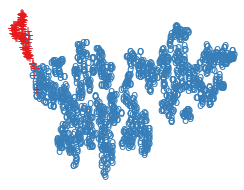

xss
900
(0.06087278574705124, 0.6993327140808105) (0.5640519559383392, 0.4909036010503769) 0.5446393049285431
(900, 2) (900,)


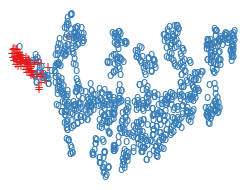

sql
3104
(0.09010552242398262, 0.8522250056266785) (0.49387580156326294, 0.4473307579755783) 0.5718127229234785
(2000, 2) (2000,)


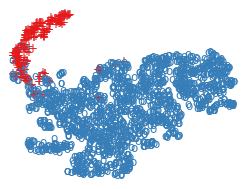

command_injection
1649
(0.05010758526623249, 0.7260183990001678) (0.560167670249939, 0.5934349298477173) 0.5270101200034821
(1649, 2) (1649,)


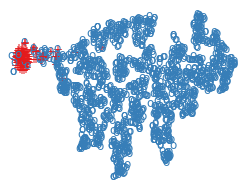

path_disclosure
2185
(0.057493509724736214, 0.8859304785728455) (0.5217602849006653, 0.4138147234916687) 0.6621456975078267
(2000, 2) (2000,)


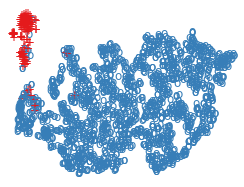

remote_code_execution
885
(0.01678275503218174, 0.9378038048744202) (0.4845782518386841, 0.40662600100040436) 0.7078011628705231
(885, 2) (885,)


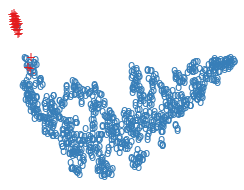

xsrf
2680
(0.07779215276241302, 0.7356976270675659) (0.5869925916194916, 0.5139486193656921) 0.5553896914320674
(2000, 2) (2000,)


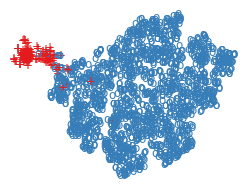

In [22]:
import json
import numpy as np
# %matplotlib inline
import pandas as pd
from glob import glob
from pdb import set_trace
from pathlib import Path
import seaborn as sns;
from sklearn.model_selection import train_test_split
import os
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.core.pylabtools import figsize
# --- Configure seaborn ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style({'font.family': 'Palatino'})
sns.set_style("ticks")
sns.set_context("poster", font_scale=1.75, rc={"lines.linewidth": 4.5})
colors = ["pale red", "windows blue", "green grey", "dusty purple", "amber", "faded green"]
sns.set_palette(sns.xkcd_palette(colors))
figsize(4, 3)

def calculate_centroids(_features, _labels):
    pos = []
    neg = []
    for f, l  in zip(_features, _labels):
        if l == 1:
            pos.append(f)
        else:
            neg.append(f)
    posx = [x[0] for x in pos]
    posy = [x[1] for x in pos]
    negx = [x[0] for x in neg]
    negy = [x[1] for x in neg]
    _px = np.median(posx)
    _py = np.median(posy)
    _nx = np.median(negx)
    _ny = np.median(negy)
    return (_px, _py), (_nx, _ny)
    pass


def calculate_distance(p1, p2):
    return np.abs(np.sqrt(((p1[0] - p2[0])*(p1[0] - p2[0])) + ((p1[1] - p2[1])*(p1[1] - p2[1]))))
    pass

import matplotlib.patches as patches

if __name__ == '__main__':
    model_name = 'blstm'
    home_path = '/home/swj/VD/'
    code_type = 'python'
    embedding_path = home_path + 'embedding/'
    mode = "command_injection"
    ways = 'myway'
    path = home_path + 'visualization/' + code_type + '/' + model_name + '_' + ways + '/'
    files= os.listdir(path)
    for file in files:
        file_name, file_extension = os.path.splitext(file)
        if file_extension == '.json':
            data_set_names = file_name.split('-')
            print(data_set_names[0])
            input_file = file
            
            _features, _labels = json.load(open(path + input_file))

            features = []
            labels = []
            r = 1.0
            for f, l in zip(_features, _labels):
                if f[0] <= r and f[1] <= r:
                    features.append([f[0] * (1/r), f[1]* (1/r)])
                    labels.append(l)
            pmed, nmed = calculate_centroids(features, labels)
            dist = calculate_distance(pmed, nmed)
            print(len(_features))
            if len(_features) > 2000:
                _, features, _,  labels = train_test_split(features, labels, test_size=2000)
            print(pmed, nmed, dist)
            features = np.array(features)
            X = features
            labels = np.array(labels)
            Y = labels
            print(X.shape, Y.shape)
            fig, ax = plt.subplots()

            for i in range(X.shape[0]):
                if Y[i] == 0:
                    ax.text(X[i, 0], X[i, 1], 'o',
                             color=plt.cm.Set1(1),
                             fontdict={'size': 12})
                else:
                    ax.text(X[i, 0], X[i, 1], '+',
                             color=plt.cm.Set1(0),
                             fontdict={ 'size': 12})
            plt.xticks([]), plt.yticks([])
            plt.axis('off')
            output_file = model_name + data_set_names[0] + '_' + 'dist: ' + str(dist) + '_Revel-tsne.png'
            plt.savefig(path + output_file)
            plt.show()
            pass
        

